---

# Gradient Descent

Gradient descent is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.

## How gradient descent works?

The probelm is that there is a function $f(\pmb \omega)$, we need to find 

$$\underset {\omega \in R^n}{min} f(\pmb \omega)$$

In other words, when we find the minimum we win.

<p>
    <img src="gradient_descent_plot1.png" width="400" align="center">
</p>

The main idea is 

$$
w_{n+1} = w_n - \alpha f'(w_n) \:\:\:\:\:\:\:\:\:\: (\text{Gradient Descent Update Rule})
$$

The value of how far to move in the opposite sign of the derivative of $f(w)$ at $w_0$ is called the **learning rate** (Nocedal & Wright call this *hyperparameter* the **step length**), and is typically denoted by $\alpha$. The process of multiplying the derivative of $f(w)$ at $w_0$ by the learning rate and forming a new choice of $w$ by subtracting this quantity from $w_0$ is called **gradient descent**.

<p>
    <img src="gradient-descent-learning-rate.png" width="500" align="center">
</p>

With different learning rate, the gradient descent pathes are different. The choice of $\alpha$ in machine learning is typically found by experimentation.

---

## Implement

### Example 1 -- Single Variable

It's clear the function $f(w)=(w-6)^2+2$ has a global minimum at $w=6$. Supposing we do not know the answer and we first guess the mimimum value of $f(w)$ occurs at $w_0=10$.

In the following, we plot each step of gradient descent results to show how it works.

First we plot the function then visualize the gradient descent with $\alpha = 0.8$.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d

# Set Seaborn theme for plots
sns.set_theme()

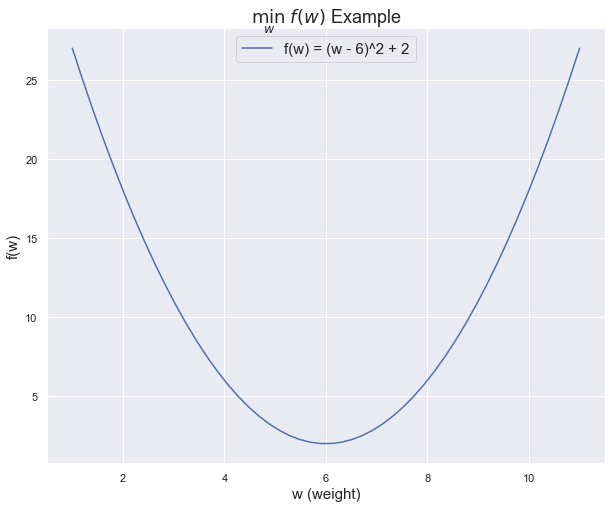

In [15]:
# Define test function for experimenting
def f(w):
    return (w - 6)**2  + 2

# Define domain variables for plotting f
domain = np.linspace(1, 11, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 6)^2 + 2")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

w_0 = 10.0 | df(w_0) = 8.0
w_1 = 3.6 | df(w_1) = -4.800000000000001
w_2 = 7.44 | df(w_2) = 2.880000000000001
w_3 = 5.14 | df(w_3) = -1.7280000000000015
w_4 = 6.52 | df(w_4) = 1.0368000000000013
w_5 = 5.69 | df(w_5) = -0.6220800000000004
w_6 = 6.19 | df(w_6) = 0.37324800000000025
w_7 = 5.89 | df(w_7) = -0.2239488000000005
w_8 = 6.07 | df(w_8) = 0.1343692799999996
w_9 = 5.96 | df(w_9) = -0.08062156799999975
w_10 = 6.02 | df(w_10) = 0.04837294080000021
w_11 = 5.99 | df(w_11) = -0.02902376447999977
w_12 = 6.01 | df(w_12) = 0.017414258687999506
w_13 = 5.99 | df(w_13) = -0.010448555212800414
w_14 = 6.0 | df(w_14) = 0.006269133127680959
w_15 = 6.0 | df(w_15) = -0.0037614798766085755
w_16 = 6.0 | df(w_16) = 0.00225688792596479
w_17 = 6.0 | df(w_17) = -0.0013541327555781635
w_18 = 6.0 | df(w_18) = 0.0008124796533461875



/var/folders/qw/tpxkzwh515nbq0dlw8mj45r80000gn/T/ipykernel_42163/2880538489.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


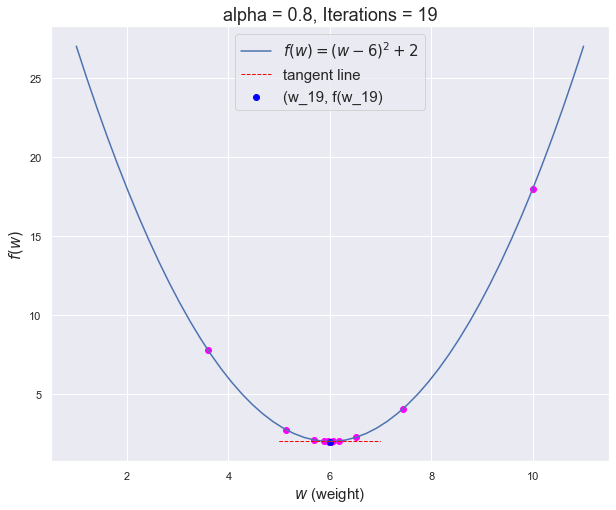

In [16]:
# Define parabola derivative
def df(w): 
    return 2*(w - 6)

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

def derivative_descent(derivative, alpha = 0.8, w_0 = 10.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")

# Set learning rate 
alpha = .8

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 6)^2 + 2$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

#### Testing different  choice of the Learning Rate $\alpha$

We can test how well our choice of the learning rate $\alpha$ was by comparing it to different choices of $\alpha$.

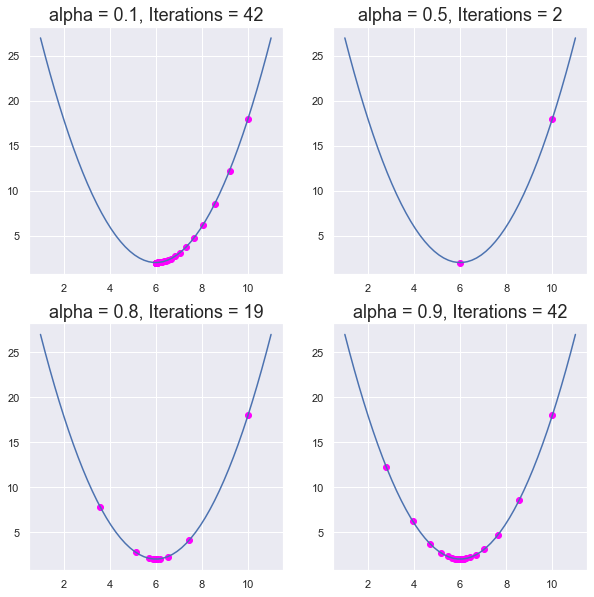

In [13]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

From the plots above, we can see it's important to choose a suitable learning rate in gradient descent.

### Example 2 - Several Variables

In this instance, we consider the multivariable function $f(w_0, w_1) = 3w_0^2 + 6w_1^2 + 2$ which has an obvious minimum at the vector $\mathbf{w} = [w_0, w_1]^T$.

First we plot the function then visualize the gradient descent with $\alpha = 0.05$.

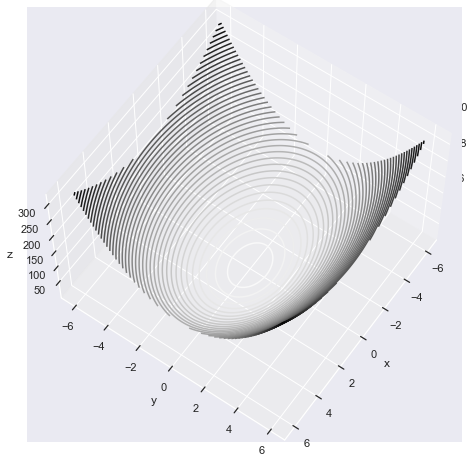

In [21]:
def f(w_0, w_1):
    return 3*w_0 ** 2 + 6*w_1 ** 2 + 2

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

## plot the fuunction
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(60, 35)
plt.show()

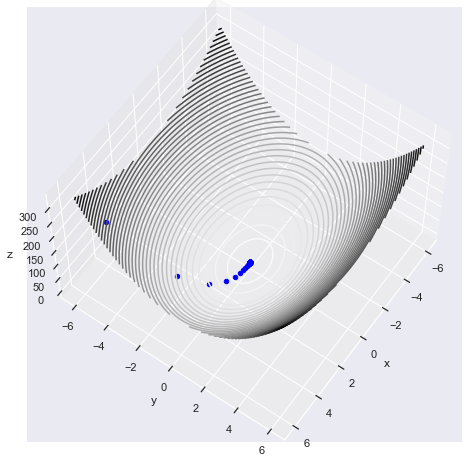

In [25]:
def df(w):
    grad = [6*w[0], 12*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.05, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()